## **GRIP@The Sparks Foundation**

## **Task-6:-**

***Prediction using Decision Tree Algorithm-*** 
The task is about predicting/classifying the right class by training a decision tree model on the iris dataset.

Dataset:- Iris.csv(Iris dataset)

Language:- Python

IDE:- Google Colab

Author:- Debanjan Mukhopadhyay

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import preprocessing
from warnings import filterwarnings
filterwarnings('ignore')

Importing all the necessary packages to be used for the task.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


Connecting to google drive to use the dataset stored in the drive

In [ ]:
input_path="/content/gdrive/My Drive/"

Initializing the file path which is the google drive path

In [ ]:
data=pd.read_csv(input_path+'Iris.csv',index_col='Id')
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


Reading the dataset which is in csv format and displaying it.

In [ ]:
data.shape

(150, 5)

There are 150 datapoints and 5 features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Metadata about the dataset is gathered

In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Gathering all the necessary statistics of the dataset to understand the dataset better.


In [ ]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Check for missing values is performed and fortunately there were none.

In [ ]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

To display all the columns present in the dataset

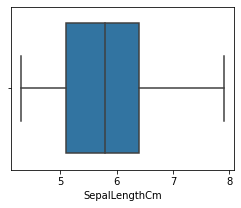

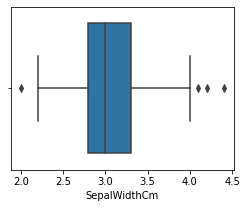

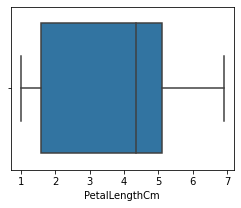

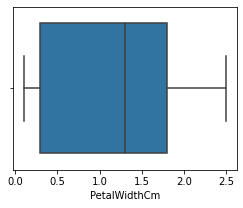

In [ ]:
for i in data.columns:
  if data[i].dtype=='float64':
    plt.figure(figsize=(4,3))
    sns.boxplot(data[i])
    plt.show()

Checking for outliers by box-plotting for all the columns in the dataset.

In [ ]:
correl=data.corr()
correl

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Correlation matrix is displayed to visualise the correlation between columns or features of the dataset.

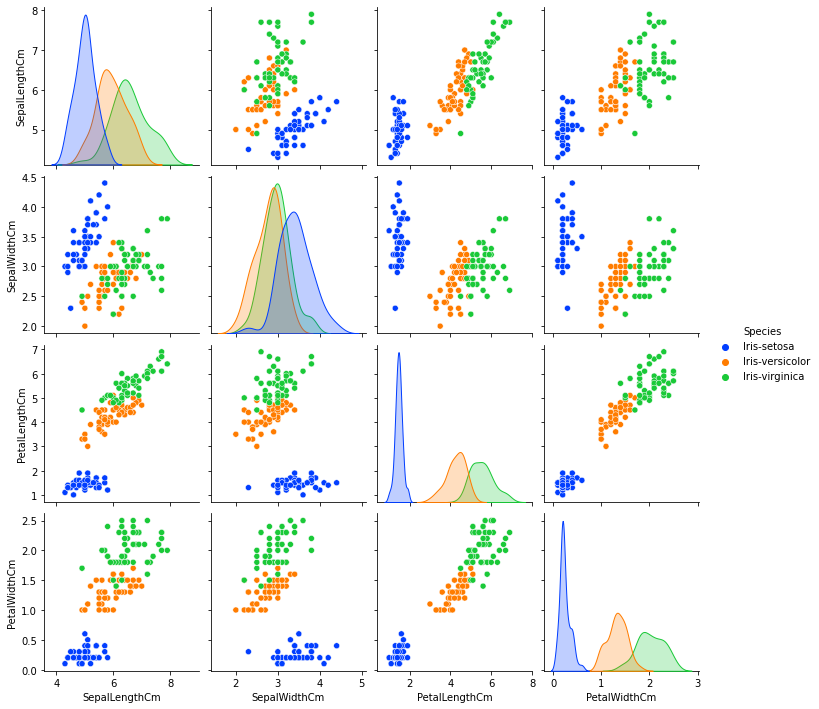

In [ ]:
sns.pairplot(data, hue='Species', palette="bright")

Pair Plotting is performed between columns of the dataset to visualise the relationship and the data distribution.

In [ ]:
data['Species']=preprocessing.LabelEncoder().fit_transform(data['Species'])
data['Species']

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

Encoding the values in species column of the dataset into different unique labels for the task.

In [ ]:
x=data.iloc[:, 1:5].values
y=data.iloc[:, -1].values

Dividing the dataset into input and output.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=0)


Splitting the input and output dataset between training and test.

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

Transforming the train and test data points by removing the mean and scaling each feature/variable/column to unit variance

In [ ]:
clfr=DecisionTreeClassifier(criterion='entropy', random_state=0)
clfr.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Fitting the training data to the decision tree model.

In [ ]:
tr=tree.DecisionTreeClassifier()
tr=tr.fit(x_train,y_train)
reps=tree.export_text(tr)
print(reps)

|--- feature_3 <= 0.56
|   |--- feature_2 <= -0.54
|   |   |--- class: 0
|   |--- feature_2 >  -0.54
|   |   |--- class: 1
|--- feature_3 >  0.56
|   |--- class: 2



Visualising the decision tree model that got trained

[Text(602.6400000000001, 679.5, 'X[3] <= 0.557\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(401.76000000000005, 407.69999999999993, 'X[2] <= -0.542\ngini = 0.499\nsamples = 71\nvalue = [37, 34, 0]'),
 Text(200.88000000000002, 135.89999999999998, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(602.6400000000001, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(803.5200000000001, 407.69999999999993, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

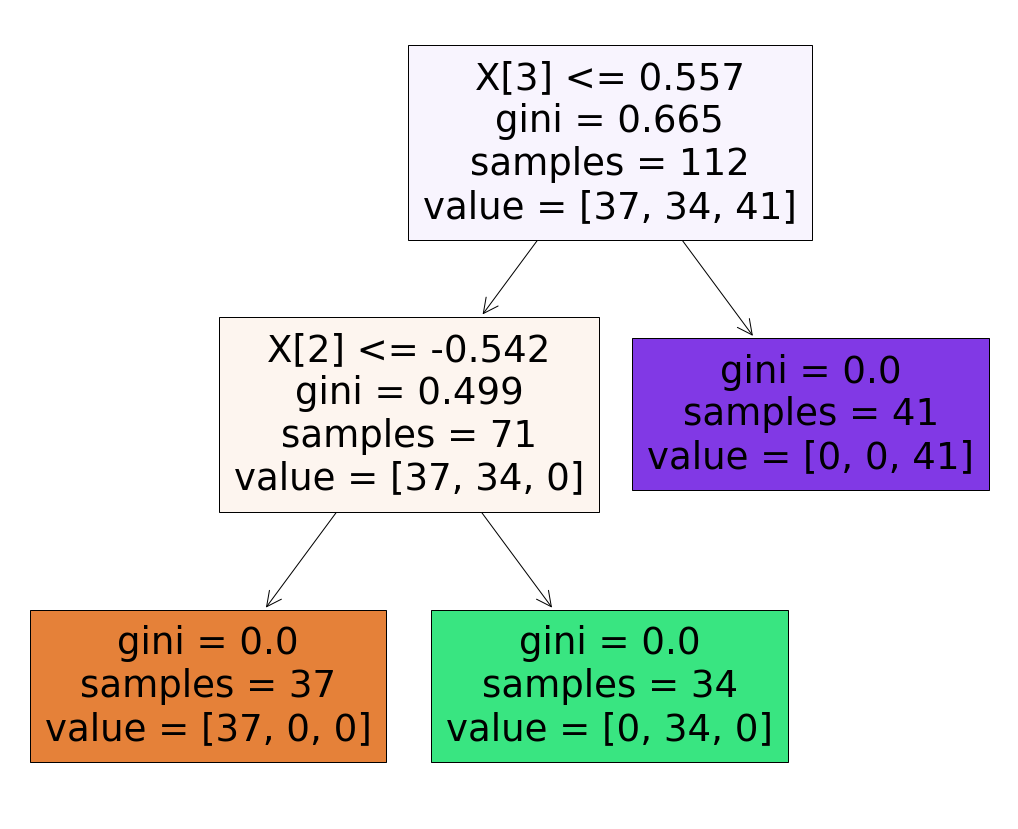

In [ ]:
plt.figure(figsize=(18,15))
plot_tree(tr,filled=True,impurity=True)

Clear plotting of the decision tree

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [ ]:
y_pred=clfr.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

Predict the y/output value for the test dataset

In [ ]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


Displaying both the actual and predicted values together

In [ ]:
np.mean(y_pred==y_test)

1.0

Checking the accuracy by comparing the predicted value with the actual output value

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

Developing a confusion matrix to check all the metrics of accuracy.

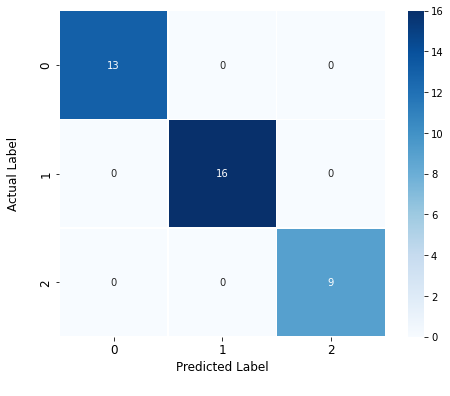

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='.0f',linewidth=0.5, square=True, cmap='Blues')
plt.xlabel('Predicted Label\n',fontsize=12)
plt.ylabel('Actual Label\n',fontsize=12)
plt.tick_params(labelsize=12)
plt.show()

Displaying a heat map for a clear depiction of confusion matrix.

In [ ]:
print(metrics.classification_report(y_test, clfr.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Reporting all the necessary metrics of accuracy.

**The classifier model could predict the species with 100% accuracy score.**